# At first, play a bit with MNIST

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

## Check format of data

In [2]:
def print_public_fields(obj):
    for field in dir(obj):
        field_is_private = field[0] == '_' or field[1] == '_'
        if not field_is_private:
            print(field, type(getattr(obj, field)))

In [3]:
print_public_fields(mnist)

count <class 'builtin_function_or_method'>
index <class 'builtin_function_or_method'>
test <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
train <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
validation <class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>


In [4]:
print_public_fields(mnist.test)

epochs_completed <class 'int'>
images <class 'numpy.ndarray'>
labels <class 'numpy.ndarray'>
next_batch <class 'method'>
num_examples <class 'int'>


### Check format of images

In [11]:
from matplotlib import pyplot as plt

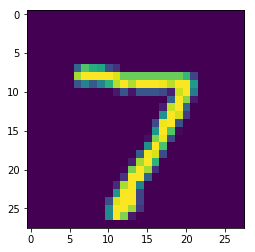

In [32]:
image = mnist.test.images[0]
image = image.reshape((28, -1))
plt.imshow(image)
plt.show()

In [31]:
print("Pixel values in range: [{}; {}]".format(image.min(), image.max()))

Pixel values in range: [0.0; 1.0]


### Train simple linear regression

In [2]:
img_len = 28*28
num_classes = 10
batch_size = 64 # Play with this parameter
test_dataset_length = len(mnist.test.labels)

In [3]:
import tensorflow as tf

In [4]:
graph = tf.Graph()

with graph.as_default():
    Xs = tf.placeholder(tf.float32, shape=[None, img_len])
    Ys = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    W = tf.Variable(tf.truncated_normal(shape=[img_len, num_classes]))
    b = tf.Variable(tf.zeros([num_classes]))
    
    logits = tf.matmul(Xs, W) + b
    loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(Ys, logits))
    
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
    
    # test
    test_predictions = tf.nn.softmax(tf.matmul(Xs, W) + b)
    correct_prediction = tf.equal(tf.argmax(Ys,1), tf.argmax(test_predictions,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
num_steps = 20000

valid_data, valid_labels = mnist.validation.next_batch(batch_size)

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    for step in range(num_steps):
        train_data, train_labels = mnist.train.next_batch(batch_size)
        l, _ = session.run([loss, optimizer], feed_dict={Xs: train_data, Ys: train_labels})
        if step % 2000 == 0:
            l = session.run(loss, feed_dict={Xs: valid_data, Ys: valid_labels})
            print("[{} step] Loss for validation dataset is {}".format(step, l))
    
    test_accuracy = session.run(accuracy, feed_dict={Xs: mnist.test.images, Ys: mnist.test.labels})
    print("Test accuracy is ", test_accuracy)

[0 step] Loss for validation dataset is 12.888274192810059
[2000 step] Loss for validation dataset is 0.270382285118103
[4000 step] Loss for validation dataset is 0.2436733841896057
[6000 step] Loss for validation dataset is 0.2596595585346222
[8000 step] Loss for validation dataset is 0.29431813955307007
[10000 step] Loss for validation dataset is 0.21821440756320953
[12000 step] Loss for validation dataset is 0.2246493250131607
[14000 step] Loss for validation dataset is 0.2179436981678009
[16000 step] Loss for validation dataset is 0.25291672348976135
[18000 step] Loss for validation dataset is 0.24580085277557373
Test accuracy is  0.9189


Complete these tutorials by yourself.

* https://www.tensorflow.org/get_started/mnist/beginners
* https://www.tensorflow.org/get_started/mnist/pros

And read this article
http://colah.github.io/posts/2015-09-Visual-Information/

Also experiment with parameters and also try RNN from official Tensorflow tutorial on this link.
https://www.tensorflow.org/tutorials/

ALso if you have a time play with tutorials on the link above

# Simple convolution neural network 

In [8]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [10]:
num_classes = 10

In [20]:
graph = tf.Graph()

with graph.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    
    W_fc1 = weight_variable([7*7*64, 1024])
    b_fc1 = bias_variable([1024])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y_conv, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict = {x: batch[0], y_: batch[1], keep_prob: 1.0})
            print("step {}, training accuracy {}".format(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        
    print("test accuracy {}".format(accuracy.eval(feed_dict={
                    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})))

step 0, training accuracy 0.05999999865889549
step 100, training accuracy 0.8799999952316284
step 200, training accuracy 0.9399999976158142
step 300, training accuracy 0.8999999761581421
step 400, training accuracy 0.9599999785423279
step 500, training accuracy 0.9599999785423279
step 600, training accuracy 0.9599999785423279
step 700, training accuracy 0.9599999785423279
step 800, training accuracy 0.9200000166893005
step 900, training accuracy 0.9800000190734863
step 1000, training accuracy 0.9599999785423279
step 1100, training accuracy 1.0
step 1200, training accuracy 0.8799999952316284
step 1300, training accuracy 1.0
step 1400, training accuracy 1.0
step 1500, training accuracy 0.9599999785423279
step 1600, training accuracy 0.9599999785423279
step 1700, training accuracy 0.9800000190734863
step 1800, training accuracy 0.9599999785423279
step 1900, training accuracy 0.9800000190734863
step 2000, training accuracy 1.0
step 2100, training accuracy 0.9800000190734863
step 2200, trai

------------

# Implementing house numbers recognizer

## Step 1: Design and test a model architecture that can identify sequences of digits in an image.

### Generate empty digit in a sequence

-0.0705977004075


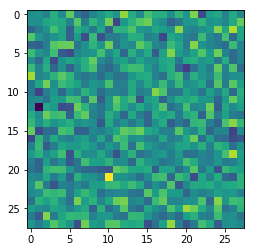

In [31]:
img = np.random.normal(size=[28, 28])
print(img.mean())
plt.imshow(img)
plt.show()

In [37]:
len(mnist.train.labels)

55000

### Working for batch generator  
Input data is 1 'long' image obtained   
from merging 5 images with digits and some empty images  

Labels are for 6 classifiers.  
Each responds for it's digit and one respond for length of sequence 

Ideas:
* To make batches uniform we will generate sequencies from 1 to 5 and repeat

Q
In SVHM dataset digits not always at the same positions
Will it be good to learn not only
```
d d d * * *
d * * * * *

but also these ?
* * d d d d
* d * d * d
```

In [3]:
# Optimize this shit someone
class BatchGenerator:
    def __init__(self, mnist, digits_limit=5):
        # self._mnist = mnist
        self._num_classes = 11 # 10 for digits and 1 for 'no digit'
        self._digits_limit = digits_limit
        
    def _noise_image(self):
        img = np.random.normal(0, 0.1, size=[28, 28])
        diff = img.max() - img.min()
        norm_img = (img - img.min()) / diff
        return norm_img
        
    def _empty_image(self):
        return np.zeros([28, 28])
    
    def _empty_label(self):
        zeros = np.zeros([11])
        zeros[-1] = 1
        return zeros
    
    # fixme: maybe too long names for variables
    def next_image(self, digits_count):
        '''
        Returns 
        
        First val: image with digits
        image of shape [28, 28*self.__digits_limit]
        where Each 28x28 part is a image from MNIST dataset
        or normalized to [0, 1] empty image (numpy.random.normal())
        or just zero filled matrix
        
        Second val: labels for top digits classifiers (by default there is 5 of them)
        array of shape [self.__digits_limit, 10]
        label for empty image is [0 x 10]
        
        Third value: count of empty images used here
        '''
        digits, digits_labels = mnist.train.next_batch(digits_count)
        digits = digits.reshape([-1, 28, 28]) # vec to image
        
        # Generate long image with digits_count in it
        image_parts = np.empty([self._digits_limit, 28, 28])
        image_parts[:digits_count] = digits
        image_parts[digits_count:self._digits_limit] = self._empty_image()
        
        image = np.hstack(image_parts)
        
        # Generate labels
        labels = np.empty([self._digits_limit, 11])
        labels[:, -1] = 0 # last digit for 'unknown' labels
        labels[:digits_count, :-1] = digits_labels
        labels[digits_count:self._digits_limit] = self._empty_label()
        
        return image, labels, digits_count
    
    # It can be done in a faster way using numpy operations
    # Rewrite it later
    def next(self, count):
        images = np.empty([count, 28, 28*self._digits_limit])
        labels = np.empty([count, self._digits_limit, 11])
        digits_counts = np.empty(count)
        
        for i in range(count):
            digits_count = i % self._digits_limit + 1
            images[i], labels[i], digits_counts[i] = self.next_image(digits_count)
        
        labels = (np.hstack(labels)).reshape([self._digits_limit, -1, 11])
        images = images.reshape([count, 28, 28*self._digits_limit, 1]) # Add one last channel dimension
        digits_counts = digits_counts.reshape([-1, 1])
        return images, labels, digits_counts

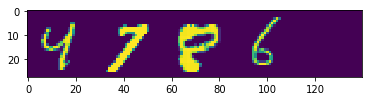

On this image is (are) 4 digit(s)
[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [4]:
bg = BatchGenerator(mnist, 5)
image, labels, digits_count = bg.next_image(4)
plt.imshow(image)
plt.show()
print(f'On this image is (are) {digits_count} digit(s)')
print(labels)

In [82]:
bg.next(10)

(array([[[[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         ..., 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]]],
 
 
        [[[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.],
          [ 0.],
          [ 0.],
          ..., 
          [ 0.],
          [ 0.],
          [ 0.]],
 
         [[ 0.

### Neural network

In [4]:
# Operations wrappers
def weights_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.2)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.zeros(shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [5]:
digits_per_image = 5
num_classes = 11

In [69]:
from abc import ABC, abstractmethod

class LinearModel(ABC):
    @abstractmethod
    def __init__(self, num_features, num_classes):
        self.num_features = num_features
        self.num_classes = num_classes
        
        self.w = weights_variable([num_features, num_classes])
        self.b = bias_variable([num_classes])
    
    def logits(self, x):
        return tf.matmul(x, self.w) + self.b
    
    def train(self, x, y):
        'trains model and returns loss before train'
        loss = self.loss(x, y)
        tf.train.AdagradOptimizer(learning_rate = 0.007).minimize(loss)
        return loss
         
class LinearClassifier(LinearModel):
    def __init__(self,  num_features, num_classes):
        LinearModel.__init__(self, num_features, num_classes)
        
    def loss(self, x, y):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=self.logits(x), labels=y)
        return tf.reduce_mean(cross_entropy) 
    
    def predictions(self, x):
        probabilities = tf.nn.softmax(self.logits(x))
        predictions = tf.argmax(probabilities, axis=1)
        return predictions
    
    def accuracy(self, x, y):
        labels = tf.argmax(y, axis=1)
        return tf.reduce_mean(tf.cast(tf.equal(self.predictions(x), labels), tf.float32))
    
class LinearRegression(LinearModel):
    def __init__(self,  num_features, num_classes):
        LinearModel.__init__(self, num_features, num_classes)
        
    def loss(self, x, y):
        mse = tf.reduce_mean(tf.squared_difference(self.logits(x), y))
        return mse
    
    def predictions(self, x):
        return self.logits(x)

In [70]:
graph = tf.Graph()

with graph.as_default():
    # conv > pool > conv > pool > fc1 > dropout > (5 or more linear classifiers and 1 for digits count)
    x = tf.placeholder(tf.float32, shape=[None, 28, digits_per_image*28, 1])
    ys = tf.placeholder(tf.float32, shape=[digits_per_image, None, num_classes])
    y_cnt = tf.placeholder(tf.float32, shape=[None, 1])
    
    W_conv1 = weights_variable([5, 5, 1, 32])
    b_conv1 = bias_variable(32)
    
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool2x2(h_conv1)
    
    W_conv2 = weights_variable([5, 5, 32, 64])
    b_conv2 = bias_variable(64)
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool2x2(h_conv2)
    
    # A little bit hacky.
    # I should learn to calc conv shapes in mind on fly
    flat_size = int(h_pool2.shape[1] * h_pool2.shape[2] * h_pool2.shape[3])
    print(h_pool2.shape, flat_size)
    
    fc1_size = 1024
    W_fc1 = weights_variable([flat_size, fc1_size])
    b_fc1 = bias_variable([fc1_size])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, flat_size])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    keep_prob = tf.placeholder(tf.float32)
    dropout = tf.nn.dropout(h_fc1, keep_prob)
    
    image_embeds = dropout
    
    # Digits classifiers
    # ================================================================
    classifiers_count = digits_per_image
    digits_classifiers = []
    for i in range(classifiers_count):
        digits_classifiers.append(LinearClassifier(fc1_size, num_classes))
    
    # Digits count classifier
    digits_count_classifier = LinearRegression(fc1_size, num_classes)
    classifiers = digits_classifiers + [digits_count_classifier]
    
    # Summary loss
    summary_loss = 0
    losses = [None for i in range(classifiers_count)]
    for i, classifier in enumerate(digits_classifiers):
        losses[i] = classifier.loss(image_embeds, ys[i])
        summary_loss += losses[i]
    summary_loss += digits_count_classifier.loss(image_embeds, y_cnt)
    average_loss = summary_loss / (classifiers_count + 1)
    
    summary_train_step = tf.train.AdamOptimizer(learning_rate = 0.007).minimize(average_loss)

(?, 7, 35, 64) 15680


In [76]:
num_steps = 500
bg = BatchGenerator(digits_per_image)
batch_size = 64
training_approach = "use summary loss"
validation_size = 300 # todo choose it right

with tf.Session(graph=graph) as session:
    session.run(tf.global_variables_initializer())
    for i in range(num_steps):
        images, labels, empties_counts = bg.next(batch_size)
        feed_dict = {
            x: images,
            ys: labels,
            y_cnt: empties_counts,
            keep_prob: 0.5
        }
  
        # Training
        if training_approach == "use summary loss":
            session.run([summary_train_step], feed_dict=feed_dict)
        else:
            for j in range(digits_per_image):
                session.run([digits_classifiers[j].train(image_embeds, ys[j])], feed_dict = feed_dict)
            session.run([digits_count_classifier.train(image_embeds, y_cnt)], feed_dict = feed_dict)

        if i % 10 == 0: 
            print(f'step {i}')

        # Validation
        if i % 50 == 0:
            images, labels, empties_counts = bg.next(validation_size)
            feed_dict = {
                x: images,
                ys: labels,
                y_cnt: empties_counts,
                keep_prob: 1.0
            }

            l = session.run([average_loss], feed_dict = feed_dict)
            print(f"Average loss: {l}")
            
            for j in range(classifiers_count):
                l = session.run(losses[j], feed_dict = feed_dict)
                accuracy = session.run([digits_classifiers[j].accuracy(image_embeds, ys[j])], feed_dict = feed_dict)
                print(f"{j}th classifier: [accuracy: {accuracy}, loss: {l}]")
                
            l = session.run([digits_count_classifier.loss(image_embeds, y_cnt)], feed_dict = feed_dict)
            print(f"Digits count classifier loss: {l}") 

step 0
Average loss: [55695.496]
0th classifier: [accuracy: [0.11666667], loss: 146.58306884765625]
1th classifier: [accuracy: [0.063333333], loss: 131.9244842529297]
2th classifier: [accuracy: [0.063333333], loss: 163.53924560546875]
3th classifier: [accuracy: [0.11333334], loss: 106.11009216308594]
4th classifier: [accuracy: [0.016666668], loss: 177.06617736816406]
Digits count classifier loss: [333447.75]
step 10
step 20
step 30
step 40
step 50
Average loss: [1.7197455]
0th classifier: [accuracy: [0.23333333], loss: 2.1988847255706787]
1th classifier: [accuracy: [0.28666666], loss: 2.2783501148223877]
2th classifier: [accuracy: [0.41333333], loss: 1.9179162979125977]
3th classifier: [accuracy: [0.60333335], loss: 1.5477805137634277]
4th classifier: [accuracy: [0.80000001], loss: 1.1125097274780273]
Digits count classifier loss: [1.2630321]
step 60
step 70
step 80
step 90
step 100
Average loss: [1.2262799]
0th classifier: [accuracy: [0.37333333], loss: 1.8950004577636719]
1th classif

Old version velow
---------

In [11]:
graph = tf.Graph()

with graph.as_default():
    # conv > pool > conv > pool > fc1 > dropout > (5 or more linear classifiers and 1 for digits count)
    x = tf.placeholder(tf.float32, shape=[None, 28, digits_per_image*28, 1])
    ys = tf.placeholder(tf.float32, shape=[digits_per_image, None, num_classes])
    y_cnt = tf.placeholder(tf.float32, shape=[None, 1])
    
    W_conv1 = weights_variable([5, 5, 1, 32])
    b_conv1 = bias_variable(32)
    
    h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)
    h_pool1 = max_pool2x2(h_conv1)
    
    W_conv2 = weights_variable([5, 5, 32, 64])
    b_conv2 = bias_variable(64)
    
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool2x2(h_conv2)
    
    # A little bit hacky.
    # I should learn to calc conv shapes in mind on fly
    flat_size = int(h_pool2.shape[1] * h_pool2.shape[2] * h_pool2.shape[3])
    print(h_pool2.shape, flat_size)
    
    fc1_size = 1024
    W_fc1 = weights_variable([flat_size, fc1_size])
    b_fc1 = bias_variable([fc1_size])
    
    h_pool2_flat = tf.reshape(h_pool2, [-1, flat_size])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    keep_prob = tf.placeholder(tf.float32)
    dropout = tf.nn.dropout(h_fc1, keep_prob)
    
    image_embeds = dropout
       
    classifiers_count = digits_per_image
    classifiers_weights = weights_variable([classifiers_count, fc1_size, num_classes])
    classifiers_biases = bias_variable([classifiers_count, num_classes])
    
    # Classifiers
    # TODO write a class for linear classifier
    # ======================================================
    losses = [None for i in range(classifiers_count)]
    logits = [None for i in range(classifiers_count)]
    
    for i in range(classifiers_count):
        w = classifiers_weights[i]
        b = classifiers_biases[i]
        logits[i] = tf.matmul(image_embeds,w)+b
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=ys[i], logits=logits[i])
        loss = tf.reduce_mean(cross_entropy)
        losses[i] = loss
    
    # Training
    # Todo read about these optimizers
    # Fortunately there is a good course on Coursera
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
    # I found 2 approaches:
    # ======================================================
    # 1 - minimize the summ (or maybe average) of losses of all classifiers
    summary_loss = 0
    for i in range(classifiers_count):
        summary_loss += losses[i]
    train_step = optimizer.minimize(summary_loss)
       
    # ======================================================
    # 2 - minimize each classifier separately
    # Seems like a much better solution
    # Just use array of optimizers and optimize in cycle for each loss
    train_steps = [None for i in range(classifiers_count)]
    for i in range(classifiers_count):
        train_steps[i] = optimizer.minimize(losses[i])
    
    # Digits counts classifier
    # ======================================================
    # Train digits_count classifier
    # Todo think how to make this code cleaner. Maybe classes for classifiers?
    w = weights_variable([fc1_size, 1])
    b = bias_variable([1])
    digits_counts_logits = tf.matmul(image_embeds, w) + b
    mse_digits_cnt = tf.reduce_mean(tf.squared_difference(digits_counts_logits, y_cnt))
    train_step_digits_cnt = optimizer.minimize(mse_digits_cnt)
    
    # Test & Validtion
    # Digits classifiers predictions
    predictions = [None for i in range(classifiers_count)]
    accuracies = [None for i in range(classifiers_count)]
    for i in range(classifiers_count):
        probabilities = tf.nn.softmax(logits[i])
        predictions[i] = tf.argmax(probabilities, axis=1)
        labels = tf.argmax(ys[i], axis=1)
        accuracies[i] = tf.reduce_mean(tf.cast(tf.equal(predictions[i], labels), tf.float32))
        
    digits_counts_probabilities = softmax(digits_counts_logits)
    digits_counts_predictions = tf.argmax(digits_counts_probabilities, axis=1)
    # It's a linearRegression. No need to measure accuracy I think. Because no treshold. Not a classifier.

(?, 7, 35, 64) 15680


In [16]:
num_steps = 150
bg = BatchGenerator(digits_per_image)
batch_size = 64
training_approach = "use different losses" # "use summary loss"
validation_size = 50 # todo choose it right

with tf.Session(graph=graph) as session:
    session.run(tf.global_variables_initializer())
    for i in range(num_steps):
        images, labels, empties_counts = bg.next(batch_size)
        feed_dict = {
            x: images,
            ys: labels,
            y_cnt: empties_counts,
            keep_prob: 0.5
        }

        # Training
        if i % 10 == 0:
            print(f'step {i}')
            if training_approach == "use summary loss":
                # 1-st variant (look in graph)
                l, _ = session.run([summary_loss, train_step], feed_dict = feed_dict)
                print(f"Summary loss: {l}")
            else:
                # 2-nd variant (look in graph)
                for j in range(digits_per_image):
                    l, _ = session.run([losses[j], train_steps[j]], feed_dict = feed_dict)
                    print(f'{j} classifier loss: {l}')
                
            # I wonder. If each time of we train one of classifiers all CNN layers also be trained.
            # I think, yes. And then 1-st method is better    
            digits_cnt_loss, _ = session.run([mse_digits_cnt, train_step_digits_cnt], feed_dict = feed_dict)
            print(f'Digits counts classifier MSE loss: {digits_cnt_loss}')
            print('=====' * 10)
        
        # todo implement separate usage of validation dataset
        # Validation
        if i % 30 == 0:
            for j in range(classifiers_count):
                images, labels, empties_counts = bg.next(validation_size)
                feed_dict = {
                    x: images,
                    ys: labels,
                    y_cnt: empties_counts,
                    keep_prob: 1.0
                }
                accuracy = session.run([accuracies[j]], feed_dict = feed_dict)
                print(f"accuracy for {j}th classifier: {accuracy}")

step 0
0 classifier loss: 195.92706298828125
1 classifier loss: 221.378173828125
2 classifier loss: 234.76431274414062
3 classifier loss: 270.2686767578125
4 classifier loss: 127.45931243896484
Digits counts classifier MSE loss: 1764.8714599609375
accuracy for 0th classifier: [0.039999999]
accuracy for 1th classifier: [0.38]
accuracy for 2th classifier: [0.40000001]
accuracy for 3th classifier: [0.60000002]
accuracy for 4th classifier: [0.75999999]
step 10
0 classifier loss: 164.01852416992188
1 classifier loss: 98.54582214355469
2 classifier loss: 69.08731079101562
3 classifier loss: 42.90088653564453
4 classifier loss: 15.687176704406738
Digits counts classifier MSE loss: 38878.73828125
step 20
0 classifier loss: 45.44768524169922
1 classifier loss: 27.75784683227539
2 classifier loss: 16.38967514038086
3 classifier loss: 6.345805644989014
4 classifier loss: 2.836055278778076
Digits counts classifier MSE loss: 10.753807067871094
step 30
0 classifier loss: 5.544652938842773
1 classifi

### Work for bugs
Can't see overfitting. All weights in range [-0.5, 0.5]  
But results become very bad after ~20-30th iteration

Any ideas?
-----
Yes!

|Solved?|Problem or suggestion|
|-|--|
|YES!| Maybe problem is in encoding of empty image  
| | Need regularization for covnet  
| | Need optimizer with Descending learning rate  
| | Bad dropout placement in network architecture  
|YES!| maybe there should not be 0 images or empty images nullifying all weights (check 1 item of this list)  
| | Maybe add layer on the top of last NN layer

[x] Overfitting with empty images labels encoded as zeros arrays
-------
Seems like classifiers were overfitted by the empty digits label, which was a batch of zeros.  
So it also seems like there are many empty digits in batch  
**TODO** Reduce number of empty_digits in batch  
Also last classifier getting more empty digits than first. It's not fair!

Also with every graph execution around 1Gb dissapears

[ ] Education quality related of empty images diestibution
-----
Right now it's like this
```
accuracy for 0th classifier: [0.079999998]
accuracy for 1th classifier: [0.2]
accuracy for 2th classifier: [0.40000001]
accuracy for 3th classifier: [0.60000002]
accuracy for 4th classifier: [0.80000001]
```

And it's almost fully correlated with amound empty images per digit's position in number

[ ] Train each classifier separately or all in once?
---------

If we train them separately, we can give more information about their training.  
Thanks to that I found out that classifier for last digit will get more empty images, than first.  
And so it's easy to overfit to empty images.  

But every time we train each classifier, we also train all CNN before.  
It's a very expensive.  

For example 5 minutes vs 10 seconds (when training all at once).

**But seems like training all at once using summary loss optimizes more the easiest optimizer (the last , because it has many empty images). Maybe I should use average instead of summ**

that to run first: optimizer or loss function?  
-----
I think optimizer, thel loss. In that case we will   
know loss at the end after last call of optimizer